# 자동 미분 (Auto grad)

In [1]:
import tensorflow as tf

# eg: z = 2w^2 + 5

w = tf.Variable(2.)

def f(w):
    y = w**2
    z = 2 * y + 5
    return z


with tf.GradientTape() as tape: # 미분
    z = f(w) # w에 대한 미분

gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


# 자동 미분을 이용한 선형 회귀 구현

In [33]:
# eg. w = 4, b = 1 로 초기화한 상태에서 시작
W = tf.Variable(4.0)
b = tf.Variable(1.0)

In [34]:
@tf.function
def hypothesis(x):
    return W * x + b

In [35]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test))
print(hypothesis(x_test).numpy()) # tf.Tensor([]).numpy() -> list

tf.Tensor([15. 21. 23. 25.], shape=(4,), dtype=float32)
[15. 21. 23. 25.]


In [36]:
# cost function = MSE

@tf.function
def mse_loss(y_pred, y):
    return tf.reduce_mean(tf.square(y_pred - y))

In [37]:
# data
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

In [38]:
optimizer = tf.optimizers.SGD(0.01) # learning rate = 0.01

In [39]:
# 경사하강법 수행

for i in range(301):
    with tf.GradientTape() as tape:
        # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
        y_pred = hypothesis(x)

        # 평균 제곱 오차를 계산
        cost = mse_loss(y_pred, y)

    # 손실 함수에 대한 파라미터의 미분값 계산
    gradients = tape.gradient(cost, [W, b])

    # 파라미터 업데이트
    optimizer.apply_gradients(zip(gradients, [W, b])) #! 그냥 쓰는 형태를 숙지해야 한다...

    if i % 10 == 0:
        # print("gradients:", gradients, "| w:", w, "| b:", b, "| cost:", cost)
        print("epoch : {:3} | W의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, W.numpy(), b.numpy(), cost))

epoch :   0 | W의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | W의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | W의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328165
epoch :  30 | W의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306967
epoch :  40 | W의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | W의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | W의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252898
epoch :  70 | W의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | W의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223598
epoch :  90 | W의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | W의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | W의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | W의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | W의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | W의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | W의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

In [41]:
# 학습 결과에 대한 예측
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


# 케라스로 구현하는 선형회귀

In [51]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [46]:
# data
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

In [57]:
x = np.array(x)
y = np.array(y)

model = Sequential()

# 입력 x의 차원은 1, 출력 y의 차원도 1. 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# SGD는 경사 하강법을 의미. 학습률은 0.01
sgd = optimizers.SGD(learning_rate=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용
model.compile(optimizer=sgd, loss='mse', metrics=['mse']) #! metrics 는 지표일텐데... 확인 필요

# 주어진 x와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도
model.fit(x, y, epochs=300)

Epoch 1/300


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - loss: 3930.6541 - mse: 3930.6541
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 484.7224 - mse: 484.7224
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 60.7249 - mse: 60.7249
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 8.5539 - mse: 8.5539
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 2.1334 - mse: 2.1334
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.3422 - mse: 1.3422
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.2436 - mse: 1.2436
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1.2303 - mse: 1.2303
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.2274 - mse: 1.2274
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.2259 - mse: 1.2259
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.2245 - mse: 1.2245
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1.2231 - mse: 1.2231
Epoch 13/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/st

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


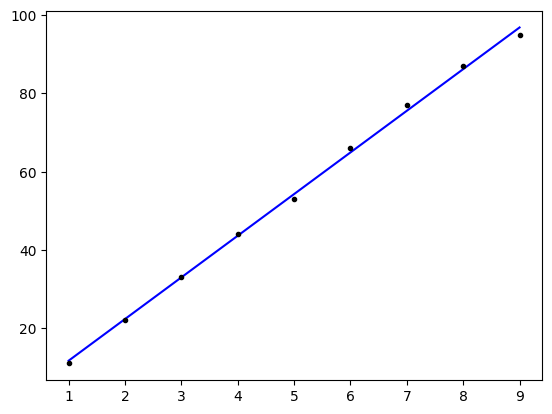

In [58]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

In [62]:
print(model.predict(np.array([9.5])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[102.16058]]
